In [1]:
import functions

In [2]:
csv_path = "../data/node1/extracted_lab_results.csv"
original_dataframe = functions.analyze_dataframe(csv_path=csv_path)
print(f'-----------> mode is : {original_dataframe["gender"].mode()[0]}')

Dataset loaded from: ../data/node1/extracted_lab_results.csv

## DATAFRAME OVERVIEW
----------------------------------------


,Metric,Value
0,Rows,298
1,Columns,10
2,Total Elements,2980
3,Memory Usage (MB),0.06



## COLUMN INFORMATION
----------------------------------------


,Column,Type,Unique Values,Unique %,Missing Count,Missing %
0,subject_id,int64,19,6.4%,0,0.00%
1,hadm_id,int64,48,16.1%,0,0.00%
2,charttime,object,298,100.0%,0,0.00%
3,blood_glucose,float64,108,36.2%,74,24.83%
4,hemoglobin,float64,66,22.1%,88,29.53%
5,wbc,float64,124,41.6%,75,25.17%
6,platelet_count,float64,160,53.7%,88,29.53%
7,creatinine,float64,33,11.1%,54,18.12%
8,gender,object,2,0.7%,0,0.00%
9,anchor_age,int64,15,5.0%,0,0.00%



## SAMPLE DATA (First 5 rows)
----------------------------------------


,subject_id,hadm_id,charttime,blood_glucose,hemoglobin,wbc,platelet_count,creatinine,gender,anchor_age
0,10000690,23280645,2150-09-17 07:25:00,96.0,9.4,28.6,262.0,0.9,F,86
1,10000690,23280645,2150-09-18 07:25:00,83.0,9.2,28.4,247.0,1.1,F,86
2,10000690,23280645,2150-09-19 06:59:00,118.0,8.9,27.4,258.0,1.2,F,86
3,10000690,23280645,2150-09-19 19:12:00,NaN,NaN,27.6,NaN,1.7,F,86
4,10000690,23280645,2150-09-20 07:20:00,70.0,9.8,29.2,243.0,1.4,F,86



## MISSINGNESS SUMMARY
----------------------------------------
Features with missing values: 5 out of 10
Features with missing values: blood_glucose, hemoglobin, wbc, platelet_count, creatinine

Top features with highest missingness:


,Column,Missing Count,Missing %
4,hemoglobin,88,29.53%
6,platelet_count,88,29.53%
5,wbc,75,25.17%
3,blood_glucose,74,24.83%
7,creatinine,54,18.12%
0,subject_id,0,0.00%
1,hadm_id,0,0.00%
2,charttime,0,0.00%
8,gender,0,0.00%
9,anchor_age,0,0.00%


-----------> mode is : F


In [3]:
#Defining the target column after checking the missingness rate 
target_column = "gender" 
functions.identify_significant_features(original_dataframe,target_column) 

Analyzing 9 features to identify predictors for 'gender'

=========================================== Full Analysis Results =========================================== 
          Feature         Type        Test   Statistic       p-value  Effect Size Effect Size Name Interpretation  Significant  Strong Enough  Recommended  Low Expected Freq  Valid Observations Data Coverage
7      creatinine    numerical       ANOVA  143.214670  3.112447e-26     0.371779      Eta squared          Large         True           True         True              False                 244         81.9%
0      subject_id    numerical       ANOVA  113.165375  1.353404e-22     0.276576      Eta squared          Large         True           True         True              False                 298        100.0%
3   blood_glucose    numerical       ANOVA   74.847800  1.037058e-15     0.252142      Eta squared          Large         True           True         True              False                 224         75.2%

In [4]:
features = [target_column,'creatinine','blood_glucose']

# usually we need to clean just the target, but for the 'MAR' missing type we need other feature to be cleaned, because the missingness depend on it 
cleaned_dataframe = functions.prepare_clean_dataset(original_dataframe,features=features) 

Original dataset: 298 rows
Clean dataset: 210 rows (70.47% of original)

Missing values summary:
Rows missing either feature: 88


In [5]:
missing_rate = 0.2
pattern = 'MNAR'

data_with_missingness , original_values = functions.introduce_missingness(df=cleaned_dataframe,feature1=features[0],feature2=features[1],missing_rate=missing_rate,task='classification',pattern=pattern)

Task: classification (using charttime as index)
Missingness pattern: MNAR
Original missing rate: 0.00%
Added 42 missing values
Final missing rate: 20.00%


In [6]:
_ = functions.analyze_dataframe(data_with_missingness)


## DATAFRAME OVERVIEW
----------------------------------------


,Metric,Value
0,Rows,210
1,Columns,10
2,Total Elements,2100
3,Memory Usage (MB),0.05



## COLUMN INFORMATION
----------------------------------------


,Column,Type,Unique Values,Unique %,Missing Count,Missing %
0,subject_id,int64,15,7.1%,0,0.00%
1,hadm_id,int64,38,18.1%,0,0.00%
2,charttime,object,210,100.0%,0,0.00%
3,blood_glucose,float64,105,50.0%,0,0.00%
4,hemoglobin,float64,60,28.6%,58,27.62%
5,wbc,float64,101,48.1%,57,27.14%
6,platelet_count,float64,127,60.5%,57,27.14%
7,creatinine,float64,33,15.7%,0,0.00%
8,gender,object,2,1.0%,42,20.00%
9,anchor_age,int64,13,6.2%,0,0.00%



## SAMPLE DATA (First 5 rows)
----------------------------------------


,subject_id,hadm_id,charttime,blood_glucose,hemoglobin,wbc,platelet_count,creatinine,gender,anchor_age
0,10000690,23280645,2150-09-17 07:25:00,96.0,9.4,28.6,262.0,0.9,NaN,86
1,10000690,23280645,2150-09-18 07:25:00,83.0,9.2,28.4,247.0,1.1,F,86
2,10000690,23280645,2150-09-19 06:59:00,118.0,8.9,27.4,258.0,1.2,F,86
4,10000690,23280645,2150-09-20 07:20:00,70.0,9.8,29.2,243.0,1.4,F,86
5,10000690,23280645,2150-09-21 07:50:00,87.0,11.4,32.8,239.0,1.0,F,86



## MISSINGNESS SUMMARY
----------------------------------------
Features with missing values: 4 out of 10
Features with missing values: hemoglobin, wbc, platelet_count, gender

Top features with highest missingness:


,Column,Missing Count,Missing %
4,hemoglobin,58,27.62%
5,wbc,57,27.14%
6,platelet_count,57,27.14%
8,gender,42,20.00%
0,subject_id,0,0.00%
1,hadm_id,0,0.00%
2,charttime,0,0.00%
3,blood_glucose,0,0.00%
7,creatinine,0,0.00%
9,anchor_age,0,0.00%


In [7]:

result_dataframe = functions.return_classification_results(data_with_missingness,features)

C:\Users\BeeClick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\BeeClick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.4.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(

In [8]:
functions.analyze_dataframe(result_dataframe)


## DATAFRAME OVERVIEW
----------------------------------------


,Metric,Value
0,Rows,210
1,Columns,13
2,Total Elements,2730
3,Memory Usage (MB),0.08



## COLUMN INFORMATION
----------------------------------------


,Column,Type,Unique Values,Unique %,Missing Count,Missing %
0,subject_id,int64,15,7.1%,0,0.00%
1,hadm_id,int64,38,18.1%,0,0.00%
2,charttime,object,210,100.0%,0,0.00%
3,blood_glucose,float64,105,50.0%,0,0.00%
4,hemoglobin,float64,60,28.6%,58,27.62%
5,wbc,float64,101,48.1%,57,27.14%
6,platelet_count,float64,127,60.5%,57,27.14%
7,creatinine,float64,33,15.7%,0,0.00%
8,gender,object,2,1.0%,42,20.00%
9,anchor_age,int64,13,6.2%,0,0.00%



## SAMPLE DATA (First 5 rows)
----------------------------------------


,subject_id,hadm_id,charttime,blood_glucose,hemoglobin,wbc,platelet_count,creatinine,gender,anchor_age,gender_dl,gender_ml,gender_mode
0,10000690,23280645,2150-09-17 07:25:00,96.0,9.4,28.6,262.0,0.9,NaN,86,F,F,F
1,10000690,23280645,2150-09-18 07:25:00,83.0,9.2,28.4,247.0,1.1,F,86,F,F,F
2,10000690,23280645,2150-09-19 06:59:00,118.0,8.9,27.4,258.0,1.2,F,86,F,F,F
4,10000690,23280645,2150-09-20 07:20:00,70.0,9.8,29.2,243.0,1.4,F,86,F,F,F
5,10000690,23280645,2150-09-21 07:50:00,87.0,11.4,32.8,239.0,1.0,F,86,F,F,F



## MISSINGNESS SUMMARY
----------------------------------------
Features with missing values: 4 out of 13
Features with missing values: hemoglobin, wbc, platelet_count, gender

Top features with highest missingness:


,Column,Missing Count,Missing %
4,hemoglobin,58,27.62%
5,wbc,57,27.14%
6,platelet_count,57,27.14%
8,gender,42,20.00%
0,subject_id,0,0.00%
1,hadm_id,0,0.00%
2,charttime,0,0.00%
3,blood_glucose,0,0.00%
7,creatinine,0,0.00%
9,anchor_age,0,0.00%


,subject_id,hadm_id,charttime,blood_glucose,hemoglobin,wbc,platelet_count,creatinine,gender,anchor_age,gender_dl,gender_ml,gender_mode
0,10000690,23280645,2150-09-17 07:25:00,96.0,9.4,28.6,262.0,0.9,NaN,86,F,F,F
1,10000690,23280645,2150-09-18 07:25:00,83.0,9.2,28.4,247.0,1.1,F,86,F,F,F
2,10000690,23280645,2150-09-19 06:59:00,118.0,8.9,27.4,258.0,1.2,F,86,F,F,F
4,10000690,23280645,2150-09-20 07:20:00,70.0,9.8,29.2,243.0,1.4,F,86,F,F,F
5,10000690,23280645,2150-09-21 07:50:00,87.0,11.4,32.8,239.0,1.0,F,86,F,F,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,10005817,28661809,2135-01-17 13:17:00,103.0,8.1,24.0,NaN,2.6,M,66,F,M,F
292,10005817,28661809,2135-01-18 01:20:00,148.0,8.2,24.4,132.0,3.0,M,66,M,M,F
294,10005817,28661809,2135-01-18 22:37:00,189.0,NaN,NaN,NaN,2.8,M,66,M,M,F
295,10005817,28661809,2135-01-19 05:00:00,131.0,8.7,25.3,160.0,2.8,M,66,M,M,F


BENCHMARKING PREDICTIONS FOR GENDER

Found 3 prediction approaches:
  - gender_dl
  - gender_ml
  - gender_mode

Analyzing 210 rows with matching charttime values.

--------------------------------------------------------------------------------
GLOBAL PERFORMANCE METRICS
--------------------------------------------------------------------------------
  Approach  Accuracy  Precision  Recall  F1 Score
0       dl    0.8333     0.8425  0.9111    0.8754
1       ml    0.8238     0.8451  0.8889    0.8664
2     mode    0.6429     0.6429  1.0000    0.7826

Best performing approach: dl (Accuracy: 0.8333)

--------------------------------------------------------------------------------
VISUALIZING PREDICTIONS VS ACTUAL VALUES
--------------------------------------------------------------------------------


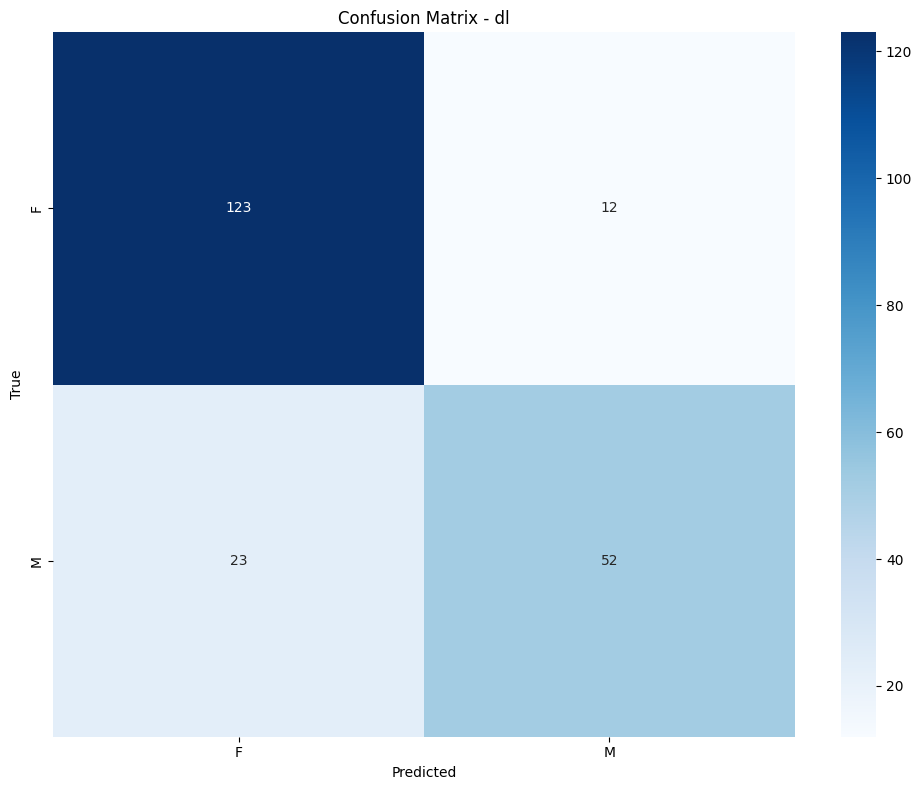

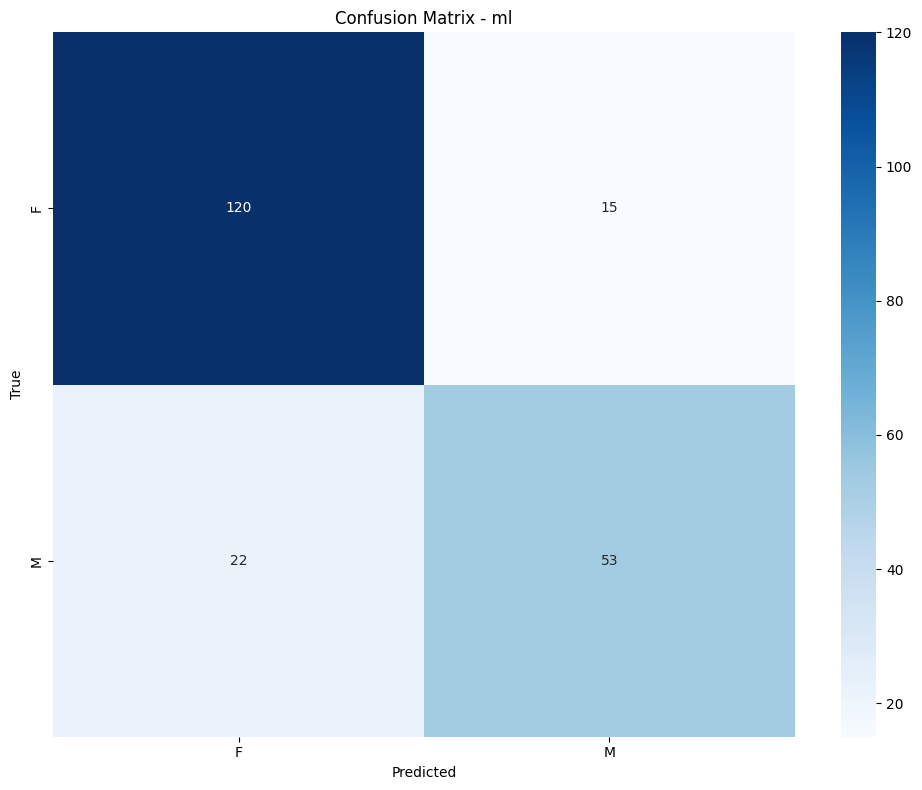

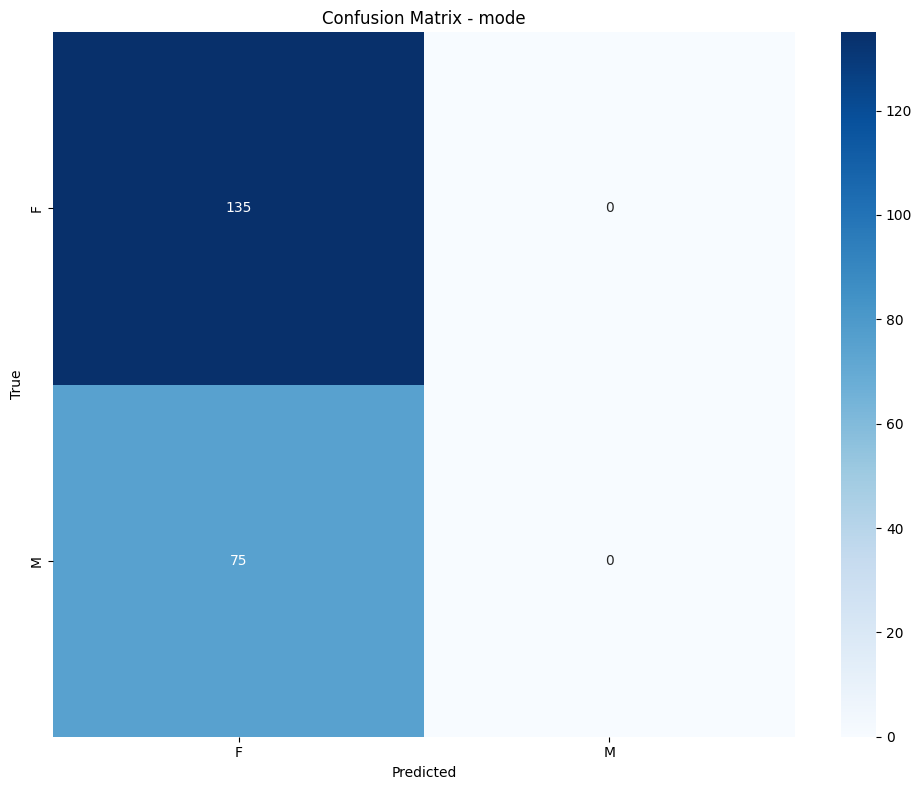

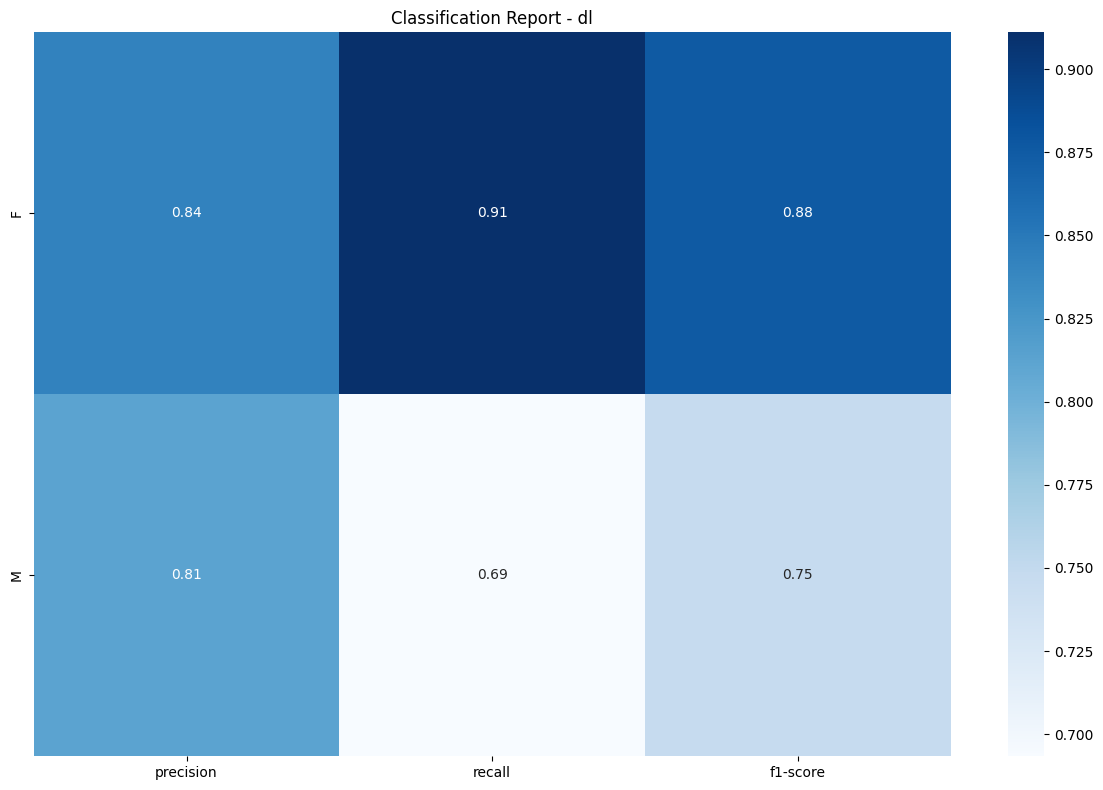

<Figure size 1000x800 with 0 Axes>

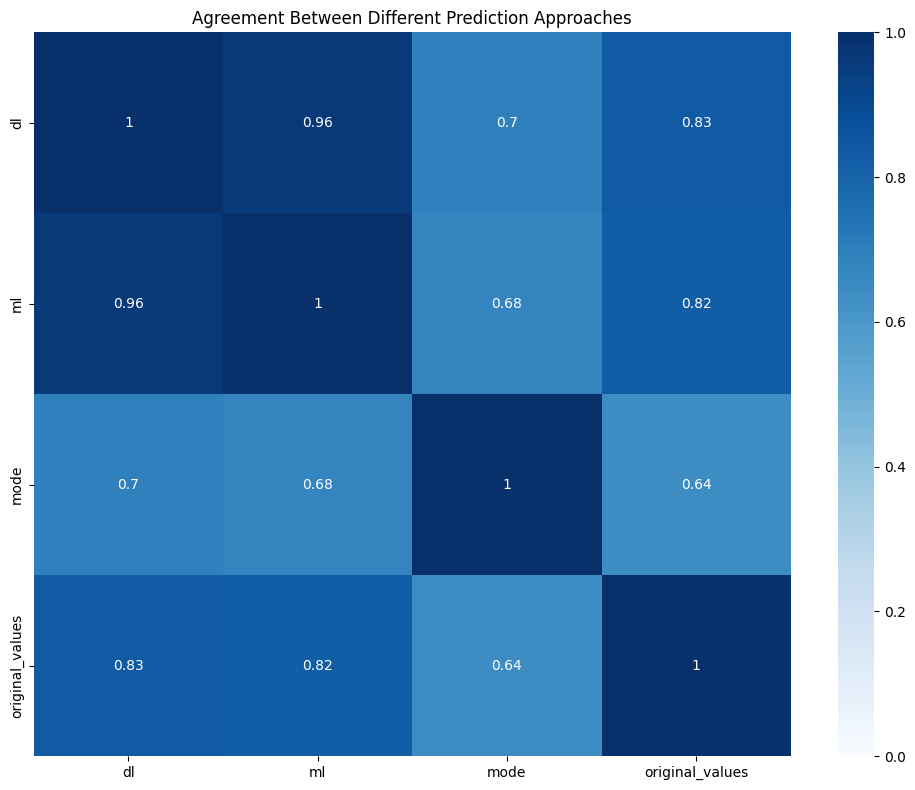


--------------------------------------------------------------------------------
DETAILED CLASSIFICATION ANALYSIS
--------------------------------------------------------------------------------
Class-wise metrics for best approach (dl):
  Class F:
    Precision: 0.8425
    Recall: 0.9111
    F1-score: 0.8754
    Support: 135.0
  Class M:
    Precision: 0.8125
    Recall: 0.6933
    F1-score: 0.7482
    Support: 75.0

Comparison of class-wise metrics across approaches:
                dl     ml   mode
F_precision 0.8425 0.8451 0.6429
F_recall    0.9111 0.8889 1.0000
F_f1-score  0.8754 0.8664 0.7826
M_precision 0.8125 0.7794 0.0000
M_recall    0.6933 0.7067 0.0000
M_f1-score  0.7482 0.7413 0.0000

--------------------------------------------------------------------------------
SUMMARY OF FINDINGS
--------------------------------------------------------------------------------
1. Best performing approach: dl
2. Ranking of approaches by Accuracy (best to worst):
   1. dl (Accuracy: 0.833

C:\Users\BeeClick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BeeClick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BeeClick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_cla

{'metrics':   Approach  Accuracy  Precision  Recall  F1 Score
 0       dl    0.8333     0.8425  0.9111    0.8754
 1       ml    0.8238     0.8451  0.8889    0.8664
 2     mode    0.6429     0.6429  1.0000    0.7826,
 'detailed_metrics': {'dl': {'accuracy': 0.8333333333333334,
   'precision': 0.8424657534246576,
   'recall': 0.9111111111111111,
   'f1': 0.8754448398576512},
  'ml': {'accuracy': 0.8238095238095238,
   'precision': 0.8450704225352113,
   'recall': 0.8888888888888888,
   'f1': 0.8664259927797834},
  'mode': {'accuracy': 0.6428571428571429,
   'precision': 0.6428571428571429,
   'recall': 1.0,
   'f1': 0.782608695652174}},
 'error_analysis':                 dl     ml   mode
 F_precision 0.8425 0.8451 0.6429
 F_recall    0.9111 0.8889 1.0000
 F_f1-score  0.8754 0.8664 0.7826
 M_precision 0.8125 0.7794 0.0000
 M_recall    0.6933 0.7067 0.0000
 M_f1-score  0.7482 0.7413 0.0000,
 'best_approach': 'dl',
 'task_type': 'classification'}

In [ ]:
_ = functions.benchmark_predictions(result_dataframe,original_values,features[0],task_type='classification')